Out of all the models I ran, Ridge gave better results.

Best Mean Cross-validation score: 0.19

Ridge.intercept_: 26.683522313777967

Ridge Test Performance:  0.19681043164635847

train mse: 874.5666584486872

train rmse: 29.57307319925826

train r2: 0.2015647536145896


test mse: 914.2557965053041

test rmse: 30.236663117898843

test r2: 0.19681043164635847


I wasn't able to run SVR, Polynomial regression with and without regularisation.

SVR took me real long time to run.

With Polynomial Regression,everytime I run it,my screen went blank and I had to restart my laptop to run it back.


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data = pd.read_csv("Patent_Data.csv")


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 25 columns):
pat        65535 non-null int64
fwd        65535 non-null int64
lag_d      65535 non-null int64
lag_y      65535 non-null int64
noc        65535 non-null int64
gy         65535 non-null int64
ay         65535 non-null int64
noi        65535 non-null int64
UMC        65535 non-null int64
firm       65535 non-null int64
MSA        65535 non-null int64
tbm        65535 non-null int64
tbru       65535 non-null float64
PAG        65535 non-null float64
npr        65535 non-null int64
fpr        65535 non-null int64
FT         65535 non-null int64
Cent       65535 non-null float64
EXP_Y      65535 non-null float64
DT         65535 non-null float64
IT         65535 non-null float64
RT         65535 non-null float64
3rd_PT     65535 non-null float64
Rnd_Int    65535 non-null float64
FS         38808 non-null float64
dtypes: float64(10), int64(15)
memory usage: 12.5 MB


In [37]:
data.describe()

,pat,fwd,lag_d,noc,gy,ay,noi,UMC,firm,MSA,...,fpr,FT,Cent,EXP_Y,DT,IT,RT,3rd_PT,Rnd_Int,FS
count,6.553500e+04,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,6.553500e+04,65535.000000,...,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,38808.000000
mean,5.516818e+06,26.730800,923.934127,18.856489,1995.320287,1992.773480,2.444038,567.743236,4.364026e+05,275.958251,...,1.084245,2.225330,0.000498,1.638537,0.916463,80.069878,0.255761,0.006082,0.086413,129.095522
std,4.662926e+05,33.322636,364.032954,15.708926,4.481961,4.416591,1.792134,180.319111,3.336912e+06,188.192800,...,3.031729,0.661858,0.006973,2.625059,2.324044,420.356247,1.311577,0.078734,6.469271,123.784974
min,4.184347e+06,0.000000,0.000000,1.000000,1980.000000,1979.000000,1.000000,2.000000,0.000000e+00,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.237184e+06,8.000000,691.500000,9.000000,1993.000000,1991.000000,1.000000,375.000000,2.500600e+05,142.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
50%,5.625570e+06,16.000000,888.000000,16.000000,1997.000000,1994.000000,2.000000,704.000000,3.867350e+05,260.000000,...,0.000000,2.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.050170,94.000000
75%,5.881240e+06,33.000000,1100.000000,24.000000,1999.000000,1996.000000,3.000000,711.000000,6.726890e+05,526.000000,...,1.000000,3.000000,0.000000,2.500000,0.666660,0.000000,0.000000,0.000000,0.073030,225.000000
max,6.836878e+06,841.000000,5285.000000,375.000000,2004.000000,1997.000000,32.000000,800.000000,8.520611e+08,610.000000,...,91.000000,7.000000,0.338530,24.000000,46.000000,3161.845890,87.444440,8.250000,1639.000000,854.000000


In [38]:
data.columns

Index(['pat', 'fwd', 'lag_d', 'noc', 'gy', 'ay', 'noi', 'UMC', 'firm', 'MSA',
       'tbm', 'tbru', 'PAG', 'npr', 'fpr', 'FT', 'Cent', 'EXP_Y', 'DT', 'IT',
       'RT', '3rd_PT', 'Rnd_Int', 'FS'],
      dtype='object')

In [5]:
data.drop(columns=['lag_y'],inplace=True)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['fwd'], axis=1),
                                                    data['fwd'],
                                                    test_size=0.35,
                                                    random_state=0)

X_train.shape, X_test.shape

((42597, 23), (22938, 23))

In [7]:
categorical=['gy','ay','firm','UMC','MSA','FT']

In [8]:
continuous=list(set(list(data.columns))-set(categorical))

In [9]:
cont=[]
for i in continuous:
    if i!='fwd':
        cont.append(i)

In [10]:
cont

['tbm',
 'Rnd_Int',
 'fpr',
 'PAG',
 'IT',
 'Cent',
 'noc',
 'noi',
 'FS',
 'EXP_Y',
 '3rd_PT',
 'tbru',
 'lag_d',
 'RT',
 'npr',
 'DT',
 'pat']

In [27]:
len(continuous)

18

In [28]:
len(categorical)

6

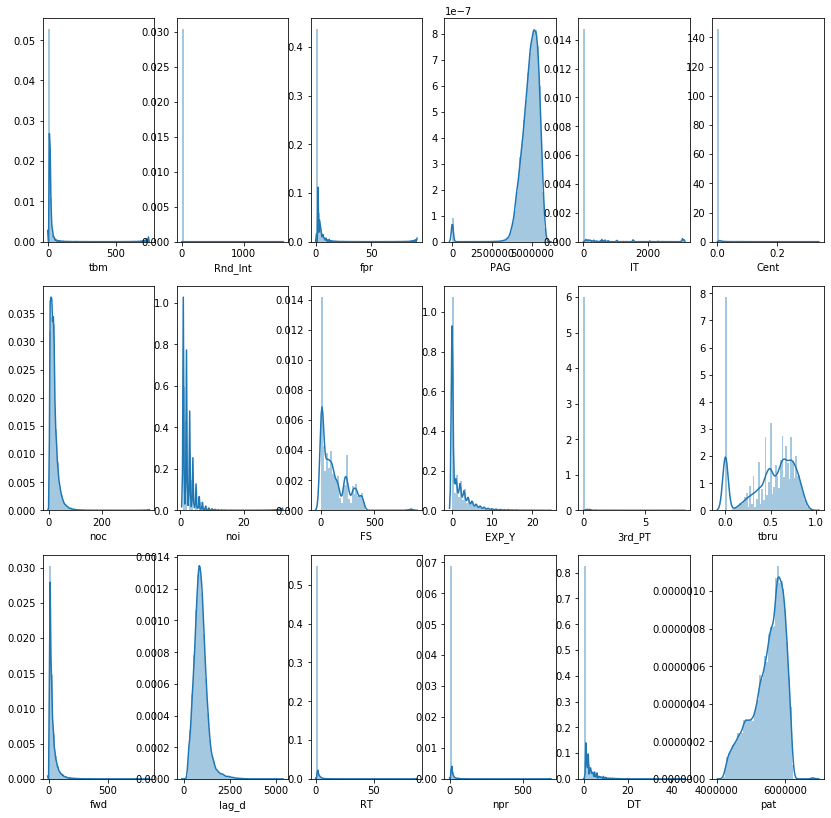

In [31]:
fig, axs = plt.subplots(ncols=6, nrows=3,figsize=(14,14))
axs = axs.flatten() 

for i, var in enumerate(continuous):
    sns.distplot(data[data[var].notnull()][var], ax=axs[i]);

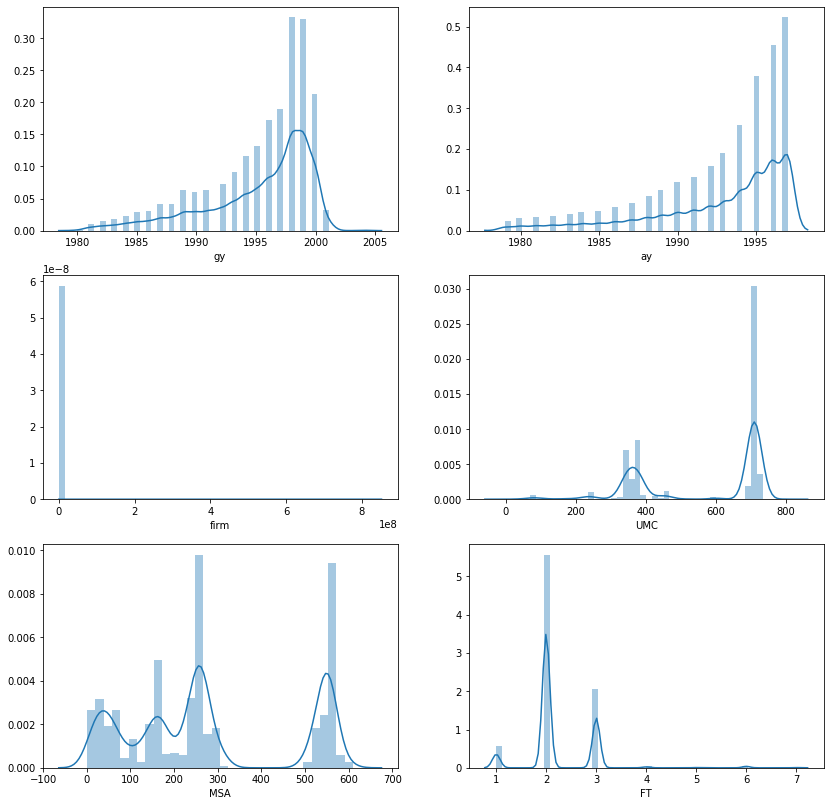

In [32]:
fig, axs = plt.subplots(ncols=2, nrows=3,figsize=(14,14))
axs = axs.flatten() 

for i, var in enumerate(categorical):
    sns.distplot(data[data[var].notnull()][var], ax=axs[i]);

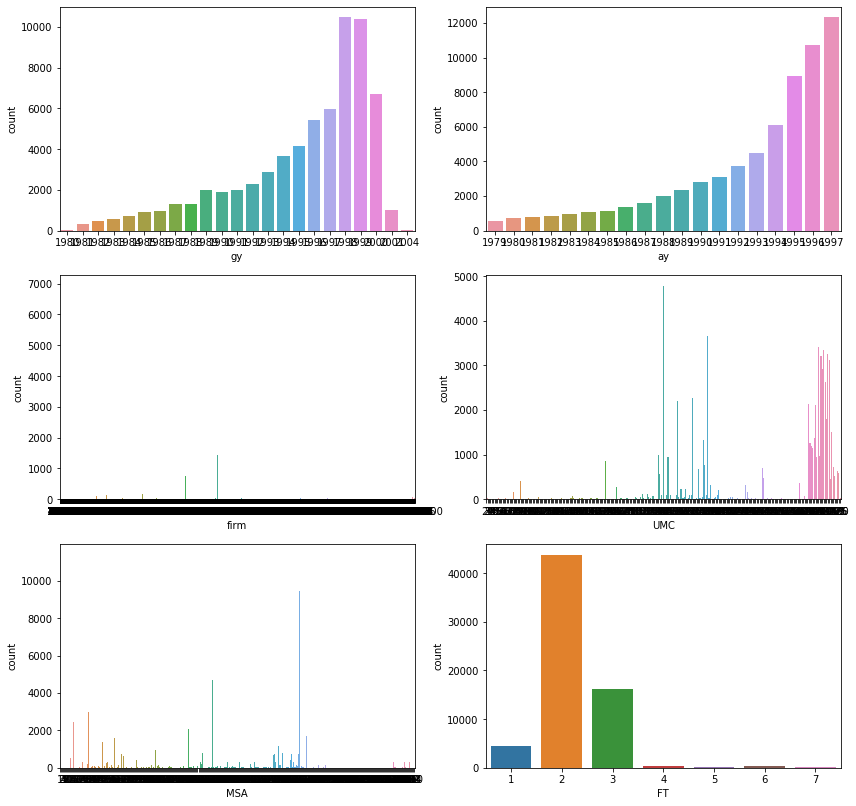

In [33]:
fig, axs = plt.subplots(ncols=2, nrows=3,figsize=(14,14))
axs = axs.flatten() 

for i, var in enumerate(categorical):
    sns.countplot(data[data[var].notnull()][var], ax=axs[i]);

In [34]:
cor=data.corr()
cor

,pat,fwd,lag_d,noc,gy,ay,noi,UMC,firm,MSA,...,fpr,FT,Cent,EXP_Y,DT,IT,RT,3rd_PT,Rnd_Int,FS
pat,1.000000,-0.141972,0.202323,0.166601,0.989931,0.956705,0.038241,0.060228,0.006299,0.020845,...,0.102586,-0.012964,0.063350,0.149673,0.144957,0.179028,0.051105,0.028225,0.005153,-0.162873
fwd,-0.141972,1.000000,-0.051972,0.154408,-0.130106,-0.120877,0.081243,0.053494,0.001469,-0.146969,...,0.034073,-0.136317,-0.014453,-0.038922,-0.033723,-0.046555,-0.011759,-0.007944,-0.002955,0.016218
lag_d,0.202323,-0.051972,1.000000,0.074041,0.166987,-0.055288,0.044779,0.087624,0.001676,0.004062,...,0.058427,0.011705,-0.021451,-0.049167,-0.032645,-0.038471,-0.048942,-0.002109,0.001970,0.013404
noc,0.166601,0.154408,0.074041,1.000000,0.160142,0.145947,0.061785,-0.007370,0.005411,-0.098358,...,0.092167,-0.078903,0.011848,0.029057,0.038504,0.033503,0.019321,0.006043,-0.000731,-0.128946
gy,0.989931,-0.130106,0.166987,0.160142,1.000000,0.971113,0.040633,0.056991,0.005797,0.022759,...,0.101282,-0.012920,0.057780,0.151240,0.142125,0.162125,0.051899,0.028176,0.005293,-0.155691
ay,0.956705,-0.120877,-0.055288,0.145947,0.971113,1.000000,0.031395,0.036866,0.006106,0.023074,...,0.090934,-0.015389,0.064038,0.167301,0.152469,0.174797,0.065232,0.028571,0.004989,-0.162762
noi,0.038241,0.081243,0.044779,0.061785,0.040633,0.031395,1.000000,0.056874,0.004271,0.003763,...,0.074631,0.050158,0.022377,0.024948,0.083224,0.058652,0.280998,0.096779,-0.003369,0.104745
UMC,0.060228,0.053494,0.087624,-0.007370,0.056991,0.036866,0.056874,1.000000,0.000274,-0.103410,...,-0.081507,-0.060472,0.037537,0.051939,0.080030,0.064879,0.042797,0.025127,-0.002946,0.026441
firm,0.006299,0.001469,0.001676,0.005411,0.005797,0.006106,0.004271,0.000274,1.000000,0.012649,...,0.002152,0.026137,-0.001029,-0.004301,-0.004344,-0.002940,-0.001321,-0.001511,0.000429,-0.111879
MSA,0.020845,-0.146969,0.004062,-0.098358,0.022759,0.023074,0.003763,-0.103410,0.012649,1.000000,...,0.129966,0.519192,-0.016710,-0.044992,-0.025669,-0.016703,-0.016185,-0.008210,-0.005835,0.122321


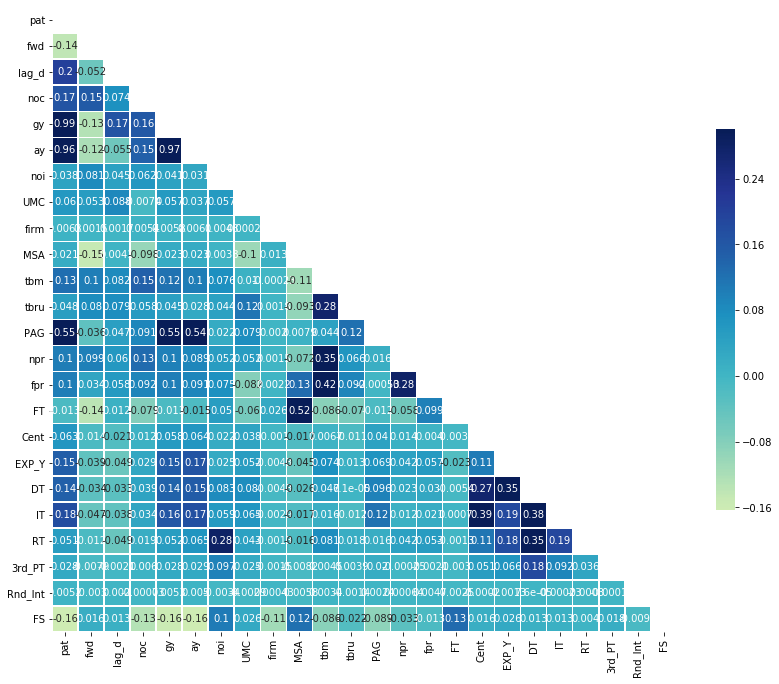

In [35]:
mask = np.triu(np.ones_like(cor, dtype=np.bool))

f, ax = plt.subplots(figsize=(14,14))

sns.heatmap(cor, mask=mask, cmap='YlGnBu', vmax=.3, center=0,annot=True,
          square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
X_train[categorical] = X_train[categorical].astype('O')
X_test[categorical] = X_test[categorical].astype('O')

In [12]:
# import relevant modules for feature engineering
from sklearn.pipeline import Pipeline
from feature_engine import missing_data_imputers as mdi
from feature_engine import categorical_encoders as ce

In [13]:
from sklearn.preprocessing import StandardScaler
from feature_engine import missing_data_imputers as mdi
from feature_engine import discretisers as dsc
from feature_engine import categorical_encoders as ce
from sklearn.preprocessing import MaxAbsScaler,RobustScaler
from feature_engine import variable_transformers as vt
from sklearn.preprocessing import RobustScaler
from feature_engine.variable_transformers import ReciprocalTransformer as rt
from sklearn.preprocessing import MinMaxScaler
from feature_engine import outlier_removers as outr
from feature_engine.outlier_removers import Winsorizer
from feature_engine.outlier_removers import ArbitraryOutlierCapper
from sklearn.pipeline import Pipeline
from feature_engine.missing_data_imputers import MeanMedianImputer
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.categorical_encoders import MeanCategoricalEncoder


In [14]:
patent_preprocess = Pipeline([
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='median',
                                          variables=['FS'])),
    # categorical encoding 
     ('rare_label_enc', ce.RareLabelCategoricalEncoder(
         tol=0.0006,n_categories=9, variables=categorical)),
    ('categorical_enc', ce.OneHotCategoricalEncoder(variables = categorical)),
    #('discr', dsc.DecisionTreeDiscretiser(cv=7,
   
                              #scoring='neg_mean_squared_error',
                              #variables=cont,
                              #param_grid=({'max_depth':range(1,10),'max_features':['auto'],'splitter':['best'],'min_samples_leaf':range(1,5)}), 
                              #regression=True)),
    ('yjt',vt.PowerTransformer(variables =cont, exp=0.50)),
     ('discretisation', dsc.EqualFrequencyDiscretiser(q=3500, variables=cont)),

    ('scaler_mean',StandardScaler(with_mean=True, with_std=True)),

     
])

In [15]:
patent_preprocess.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('imputer_num',
                 MeanMedianImputer(imputation_method='median',
                                   variables=['FS'])),
                ('rare_label_enc',
                 RareLabelCategoricalEncoder(n_categories=9, tol=0.0006,
                                             variables=['gy', 'ay', 'firm',
                                                        'UMC', 'MSA', 'FT'])),
                ('categorical_enc',
                 OneHotCategoricalEncoder(drop_last=False, top_categories=None,
                                          variables=['gy', 'ay', 'firm', 'UMC',
                                                     'MSA', 'FT...
                                             'IT', 'Cent', 'noc', 'noi', 'FS',
                                             'EXP_Y', '3rd_PT', 'tbru', 'lag_d',
                                             'RT', 'npr', 'DT', 'pat'])),
                ('discretisation',
                 EqualFrequencyDi

In [16]:
# Apply Transformations
X_train=patent_preprocess.transform(X_train)
X_test=patent_preprocess.transform(X_test)

# LINEAR REGRESSION

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lr= LinearRegression()

In [41]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train, y_train)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.18777498 0.2055135  0.17163675 0.17546225 0.18781226]
Average cross-validation score: 0.19


In [43]:
lr.score(X_train,y_train)

0.20176179463943655

In [44]:
lr.score(X_test,y_test)

0.19724286186047268

In [45]:
X_train_preds = reg.predict(X_train)
X_test_preds = reg.predict(X_test)
print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

train mse: 874.350829411257
train rmse: 29.56942389380045
train r2: 0.20176179463943655

test mse: 913.7635692087665
test rmse: 30.22852244501485
test r2: 0.19724286186047268


## LINEAR REGRESSION WITH GRID SEARCH CV

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

reg = LinearRegression()
reg.fit(X_train, y_train)
#lr.coef_
cv_scores = cross_val_score(lr, X_train, y_train)

#Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores.mean()))

# Print Co-efficients
#print("lr.coef_:", lr.coef_)
#print("lr.intercept_:", lr.intercept_)

# Check test data set performance
print("LR Performance Test: ", reg.score(X_train,y_train))
print("LR Performance Test",reg.score(X_test,y_test))
X_train_preds = reg.predict(X_train)
X_test_preds = reg.predict(X_test)
print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

Mean Cross-validation scores: 0.18563994945293463
LR Performance Test:  0.20176179463943655
LR Performance Test 0.19724286186047268
train mse: 874.350829411257
train rmse: 29.56942389380045
train r2: 0.20176179463943655

test mse: 913.7635692087665
test rmse: 30.22852244501485
test r2: 0.19724286186047268


# RIDGE

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from math import sqrt
ridge = Ridge()
cv_scores = cross_val_score(ridge, X_train, y_train,cv=5)

#define a list of parameters
param_ridge = {'alpha':np.linspace(0.001,1000,100)}#,'max_iter':[1,10,50],'tol':[0.1,0.01,0.001,0.0001] }

grid_ridge = GridSearchCV(ridge, param_ridge, cv=5, return_train_score = True)
grid_ridge.fit(X_train, y_train)
# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_ridge.best_score_))

print("Number of iteration:{}".format(len(cv_scores)))
print("Mean Accuracy:{}".format(cv_scores.mean()))

#find best parameters
print('Ridge parameters: ', grid_ridge.best_params_)

# print co-eff

print("Ridge.coef_:", grid_ridge.best_estimator_.coef_)
print("Ridge.intercept_:", grid_ridge.best_estimator_.intercept_)

# Check test data set performance

print("Ridge Test Performance: ", grid_ridge.score(X_test,y_test))
X_train_preds = grid_ridge.predict(X_train)
X_test_preds = grid_ridge.predict(X_test)
print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

Best Mean Cross-validation score: 0.19
Number of iteration:5
Mean Accuracy:0.1858319754244095
Ridge parameters:  {'alpha': 949.495}
Ridge.coef_: [-4.62691701e+00 -1.22546130e+00  3.93589044e+00  2.63868104e+00
  1.43189677e+00  1.28629101e+00  3.80862700e+00  2.64497803e+00
  4.01707382e-01 -4.53851550e-01  1.31250305e-01 -1.15013327e-01
  2.54691610e-01 -9.00970455e-01 -2.35892559e-01  1.48395778e-01
  2.29538336e+00  7.38426403e-01 -9.65221036e-01  6.06696193e-01
 -5.97465037e-01  8.59993435e-01 -4.44169640e-01 -1.63596139e+00
  4.10800540e-01  1.94511587e-01  6.81891204e-01  5.96325894e-01
  8.59889500e-02  3.28239487e-01  1.62131124e-01  2.71615709e-01
  1.43373647e+00  2.19120172e-01  6.72648740e-01 -9.82891647e-01
  1.57798584e-01 -2.12871762e-02 -1.97454918e-01 -5.41923102e-01
  5.94166866e-01 -1.74413258e+00  8.00414869e-01 -7.59816418e-01
  6.40557123e-02 -9.35606141e-01  2.83434933e-01  1.11650469e-01
  6.82035352e-01  9.78113713e-01  1.23380235e+00  4.84747657e-01
  3.513509

# SGD REGRESSOR

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from math import sqrt
reg_sgd_pipe = Pipeline([
    ('sgd_reg', SGDRegressor(max_iter=100, tol = 1e-6))
        ])
param_sgd = {'sgd_reg__alpha' :[100,10,1,0.1,0.01],'sgd_reg__penalty' :['l1','l2'],'sgd_reg__eta0':np.linspace(0.0001,1,3)}
grid_sgd = GridSearchCV(reg_sgd_pipe, param_sgd,cv=5, n_jobs=-1, return_train_score = True,scoring='neg_mean_squared_error')
# Check test data set performance

grid_sgd.fit(X_train, y_train)

# let's get the predictions
X_train_preds = grid_sgd.predict(X_train)
X_test_preds = grid_sgd.predict(X_test)
print("grid_sgd.coef_:", grid_sgd.best_params_)
print("grid_sgd.score", grid_sgd.best_score_)

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

grid_sgd.coef_: {'sgd_reg__alpha': 0.01, 'sgd_reg__eta0': 0.0001, 'sgd_reg__penalty': 'l1'}
grid_sgd.score -891.7939969405401
train mse: 874.848556930693
train rmse: 29.577838949637496
train r2: 0.20130739451936042

test mse: 914.2452537429136
test rmse: 30.236488779997483
test r2: 0.19681969364590612


C:\Users\14695\AppData\Local\Continuum\anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


# LASSO

In [26]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Lasso
lasso = Lasso(random_state=11)

#define a list of parameters

param_lasso = {'alpha':np.linspace(0.001,10,50)}

grid_lasso = GridSearchCV(lasso, param_lasso, cv=3, return_train_score = True)
grid_lasso.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_lasso.best_score_))
print()
X_train_preds = grid_lasso.predict(X_train)
X_test_preds = grid_lasso.predict(X_test)


print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

#find best parameters
print('Lasso parameters: ', grid_lasso.best_params_)

# print co-eff

print("Lasso.coef_:", grid_lasso.best_estimator_.coef_)
print("Lasso.intercept_:", grid_lasso.best_estimator_.intercept_)

# Check test data set performance
print("Lasso Test Performance: ", grid_lasso.score(X_test,y_test))

Best Mean Cross-validation score: 0.18

train mse: 874.1371122116109
train rmse: 29.56580985211822
train r2: 0.20195690766290697

test mse: 913.8139411864107
test rmse: 30.229355619768192
test r2: 0.19719860920477617
Lasso parameters:  {'alpha': 0.001}
Lasso.coef_: [-8.76339315e+00 -1.12396163e+00  4.00134077e+00  2.70855256e+00
  1.47601528e+00  1.30613760e+00  4.28509403e+00  2.70105789e+00
  4.17519071e-01 -4.91173335e-01  1.88828443e-01 -1.08802628e-01
  3.09434709e-01 -9.44349007e-01 -2.47326216e-01  4.37114223e-01
  3.08320342e+00  1.86935886e-01  4.37649642e-01 -0.00000000e+00
  1.08094392e-01  4.09683597e-01 -3.20200854e-01 -0.00000000e+00
  7.80277572e-02 -5.50023124e-01 -1.31097910e-01 -1.97574794e-01
 -5.22953819e-01 -2.35700975e-01 -5.79373652e-01  1.19857748e-01
  9.22908644e-01 -4.57920786e-01 -2.49999442e-03 -2.51260414e-01
 -3.08713138e-01 -7.69542417e-01 -3.71493885e-01 -3.83582430e-01
  4.26053176e-01 -1.96628929e+00  5.79911626e-01 -1.09115146e+00
 -2.32800001e-01 -1

# ELASTIC NET

In [27]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
param_elasticnet = {'alpha':[ 0.001, 0.01, 0.1, 1, 10],}
grid_elasticnet = GridSearchCV(elastic , param_elasticnet, cv=5, return_train_score = True)
grid_elasticnet.fit(X_train, y_train)

grid_elasticnet_train_score = grid_elasticnet.score(X_train, y_train)
grid_elasticnet_test_score = grid_elasticnet.score(X_test, y_test)
X_train_preds = grid_elasticnet.predict(X_train)
X_test_preds = grid_elasticnet.predict(X_test)


print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))


print('Training set score: ', grid_elasticnet_train_score)
print('Test score: ', grid_elasticnet_test_score)

#find best parameters
print('Best parameters: ', grid_elasticnet.best_params_)
print('Best cross-validation score:', grid_elasticnet.best_score_)

train mse: 874.2507132297211
train rmse: 29.567730944895334
train r2: 0.20185319566336035

test mse: 913.7961462347798
test rmse: 30.229061286033673
test r2: 0.1972142423783081
Training set score:  0.20185319566336032
Test score:  0.19721424237830812
Best parameters:  {'alpha': 0.01}
Best cross-validation score: 0.18612399562355553


# KNN REGRESSOR

In [28]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg=KNeighborsRegressor()
param_knn = {'n_neighbors': range(1,3)}
grid_knn = GridSearchCV(knn_reg, param_knn, cv=3, return_train_score=True)
grid_knn.fit(X_train, y_train)
X_train_preds = grid_knn.predict(X_train)
X_test_preds = grid_knn.predict(X_test)
#print("grid_lasso.coef_:", grid_lasso.best_params_)
#print("grid_lasso.score", grid_lasso.best_score_)

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

print('train score: ', grid_knn.score(X_train, y_train))
#print('test score: ', grid_knn.score(X_test, y_test))

#find best parameters
print('Best parameters: ', grid_knn.best_params_)
print('Best cross-validation score:', grid_knn.best_score_)

train mse: 396.98167711341176
train rmse: 19.924399040207255
train r2: 0.6375757523860175

test mse: 1233.417091725521
test rmse: 35.120038321811684
test r2: -0.08357829973821529
train score:  0.6375757523860175
test score:  -0.0835782997382153
Best parameters:  {'n_neighbors': 2}
Best cross-validation score: -0.13208623304598407


# POLYNOMIAL REGRESSION

I am not able to run Polynomial Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

pipe_poly=Pipeline([
    ('polynomialfeatures', PolynomialFeatures()),
    ('scaler',StandardScaler()),
    ('norm_reg', LinearRegression())
   
])
#define a list of parameters
param_poly = {'polynomialfeatures__degree':range(1,3)}

grid_poly = GridSearchCV(pipe_poly, param_poly,cv=2, n_jobs=-1, return_train_score = True,scoring='neg_mean_squared_error')


grid_poly.fit(X_train, y_train)

# let's get the predictions
X_train_preds = grid_poly.predict(X_train)
X_test_preds = grid_poly.predict(X_test)

# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

#find best parameters
print('Best parameters: ', grid_poly.best_params_)
print('Best cross validation score: ', grid_poly.best_score_)

# DECISION TREE REGRESSOR

In [26]:
from sklearn.tree import DecisionTreeRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
pt_tree = DecisionTreeRegressor(random_state = 0)
param_DT = {'max_depth': range(1,10),'splitter':['best']}#,'criterion':['mse','friedman_mse','mae'],'splitter':['best']}

grid_tree = GridSearchCV(pt_tree,param_DT,cv=5)
grid_tree.fit(X_train,y_train)
X_train_preds = grid_tree.predict(X_train)
X_test_preds = grid_tree.predict(X_test)
#print("grid_lasso.coef_:", grid_lasso.best_params_)
#print("grid_lasso.score", grid_lasso.best_score_)

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))


print(grid_tree.best_params_)
print("Accuracy on training set: {:.3f}".format(grid_tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(grid_tree.score(X_test, y_test)))
print("Best Score:",grid_tree.best_score_)


train mse: 992.7630549846834
train rmse: 31.508142677483917
train r2: 0.0936574053542708

test mse: 1038.6891256949325
test rmse: 32.22870034138722
test r2: 0.087493594561318
{'max_depth': 4, 'splitter': 'best'}
Accuracy on training set: 0.094
Accuracy on test set: 0.087
Best Score: 0.07016799118053371


# SUPPORT VECTOR MACHINE-REGRESSION

In [19]:
from sklearn.svm import SVR

param_grid = [{'kernel': ['rbf'],
               'C': [ 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1]},
              {'kernel': ['sigmoid'],
               'C':[0.1,0.25,0.5,1,10],
               'gamma': [0.001, 0.01, 0.1, 1]},
              {'kernel':['poly'],
               'degree':[1,2,3],
               'C':[0.1,0.25,0.5,1,10],
               'gamma':[0.001, 0.01, 0.1, 1]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}, {'kernel': ['sigmoid'], 'C': [0.1, 0.25, 0.5, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}, {'kernel': ['poly'], 'degree': [1, 2, 3], 'C': [0.1, 0.25, 0.5, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}]


In [ ]:
grid_search = GridSearchCV(SVR(), param_grid, cv=3,
                          return_train_score=True)
grid_search.fit(X_train, y_train)
X_train_preds = grid_search.predict(X_train)
X_test_preds = grid_search.predict(X_test)
#print("grid_lasso.coef_:", grid_lasso.best_params_)
#print("grid_lasso.score", grid_lasso.best_score_)

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

print('train score: ', grid_search.score(X_train, y_train))
print('test score: ', grid_search.score(X_train, y_train))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# POLYNOMIAL REGRESSION WITH REGULARISATION

In [ ]:
pipe_poly=Pipeline([ 
    ('polynomialfeatures', PolynomialFeatures(degree=2))
    ,('norm_reg',LinearRegression())
])
    
param_poly = [{'norm_reg':[LinearRegression()]},
              {'norm_reg':[Lasso()],'norm_reg__alpha':np.linspace(0.001,10,50)},
              {'norm_reg':[Ridge()],'norm_reg__alpha':np.linspace(0.001,1000,100)}
             ]
grid_poly = GridSearchCV(pipe_poly, param_poly,cv=5, return_train_score = True,scoring='r2')
grid_poly.fit(X_train, y_train)
X_train_preds = grid_poly.predict(X_train)
X_test_preds = grid_poly.predict(X_test)


print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))


# let's get the predictions
X_train_preds = grid_poly.predict(X_train)
X_test_preds = grid_poly.predict(X_test)

# check model performance:

print('train score: ', grid_poly.score(X_train, y_train))
print('test score: ', grid_poly.score(X_test, y_test))

#find best parameters
print('Best parameters: ', grid_poly.best_params_)
print('Best score:',grid_poly.best_score_)
